In [1]:
# import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

# bibliotecas para pintar prismas!
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Import da biblioteca externa:
from plots import plots_rectangles
from plots import plots_paint_rectangles

# Tarefa : 
> Plotar prismas de acordo com os dados fornecidos que são o número de observações e as dimensões referentes aos prismas. Neste caso, estamos considerando prismas de mesmas dimensões. Posteriormente, iremos diferenciar os prismas entre si. (OK)

In [4]:
# Coletando os limites em x e z do levantamento sintético:
nobs = 11 # número de observações
zmin = 0.0 # limite mínimo em z do levantamento sintético
zmax = 10.0 # limite máximo em z do levantamento sintético
xmin = 0.0 # limite mínimo em x do levantamento sintético
xmax = 100.0 # limite máximo em x do levantamento sintético

In [5]:
# definindo as coordenadas sinteticas do levantamento:
x = np.linspace(xmin, xmax, nobs, endpoint=True)
# é possível gerar valores para z de três formas distintas com as 4 linhas abaixo
z = np.linspace(0, 0, nobs, endpoint=True)
#z = np.zeros( len(x) )
#for i in range( len(x) ):
#    z[i] = random.uniform(0.0, -10.0)

print(x[1]-x[0])

10.0


In [6]:
# cálculo do valor que deve ser somado ou subtraido aos pontos de observação para se ter as coordenadas x dos retângulos:
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = abs( x[0] - ( xmed ) )

print (x_prisma)

5.0


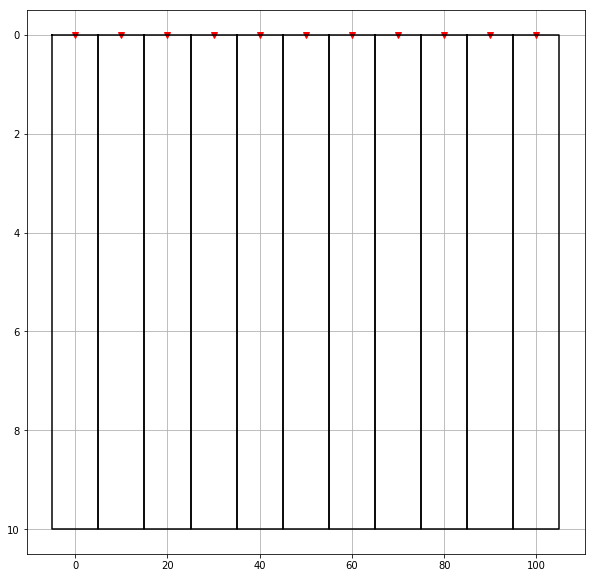

In [7]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )
plt.plot(x,z,'vr')

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

# os triângulos vermelhos consideram o relevo que pode ser a vir adicionado mais a frente dependendo do caso

# Tarefa:
> Testar a funcao plots_rectangles com o objetivo de representar um ambiente qualquer por retângulos: (OK)

In [10]:
# definicao das profundidades de cada prisma (a posteriori, sera o resultado obtido)
# é possível gerar valores para p de duas formas distintas com as 4 linhas abaixo
#p = np.linspace(2.0, 20.0, len(x), endpoint=True )
p = np.zeros( len(x) )
for i in range( len(x) ):
    p[i] = random.uniform(10.0, 20.0)

print( p )

[16.22076346 12.24343926 12.53191167 10.09608578 14.19047225 10.87095836
 11.56257258 16.3721647  11.90862789 17.78039615 11.48155554]


In [11]:
# definindo os valores de constraste de densidade
cden = np.zeros( len(x) )
for i in range( len(x) ):
    cden[i] = random.uniform(-0.7, 1.9) 
print( cden )

[ 1.4641228   1.30856062  1.12520714 -0.43203517  0.86421234 -0.25046174
  1.42775572 -0.665554    1.60444237  0.10028159 -0.56783262]


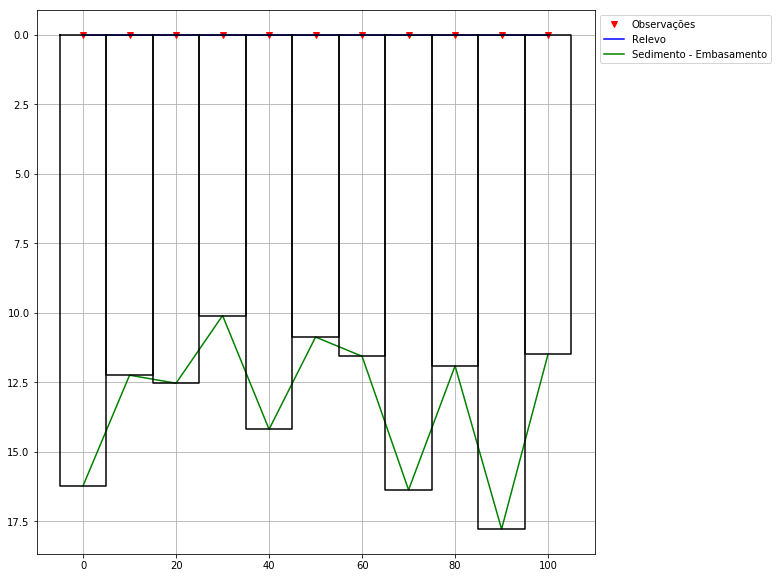

In [12]:
# teste da função plots_rectangles
x_coord, z_coord = plots_rectangles(x, z, p, color1='blue', color2='black', color3='green')

# Tarefas:
> (1) Ajustar o negocio ai (grafico) para observacoes que simulam um relevo (zo variavel) (OK, foi ajustado acima) <br> 
> (2) Preencher cada retangulo com cores, onde cada cor representa um contraste de densidade (OK) ($g/cm^3$)

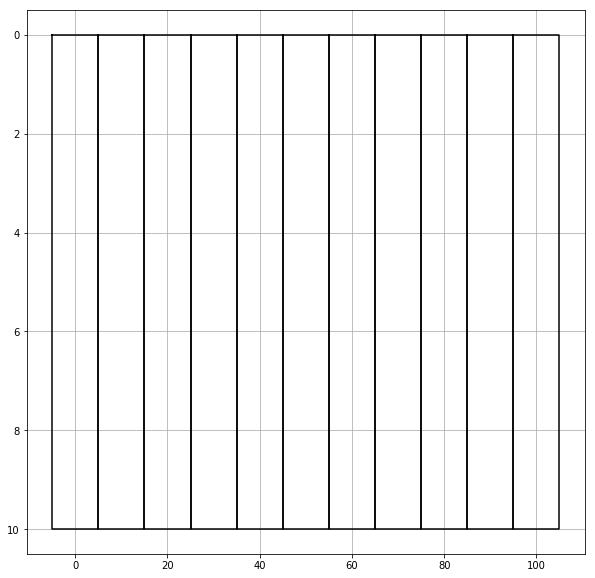

In [13]:
# inicio do desenvolvimento do raciocínio para preencher os retângulos com cores
# Visualização gráfica:
plt.figure( figsize=(10,10) )

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

i = 0 => [ 9.73374122 24.75157728 13.23580105 22.80835152 21.31956241]
i = 1 => [13.28501164 24.02772982 15.09085152  5.01920545  5.64415147]
i = 2 => [17.52513644 20.8347549  23.80834279 26.91360806  1.34960914]
i = 3 => [27.83401817  1.71084301 26.79224807 25.29426493 24.07724363]
i = 4 => [17.67995986 10.63750135 29.47793837 27.71279538  5.40872283]
i = 5 => [ 0.46909988  9.84431348 14.23180934 28.15313454 11.50970722]
i = 6 => [ 0.38750211 24.40502461  7.65638201 19.2580866   9.59220673]
i = 7 => [26.67122726 14.03056745 21.53778066 20.69025698 28.72455185]
i = 8 => [24.28207458 23.95894433 15.36921354 12.72659945  1.79455572]
i = 9 => [ 2.48961804 24.11429015 28.82504964 20.80244995 27.19222964]
i = 10 => [17.28231851  1.41733399 14.05647048  9.6760601  25.27327371]


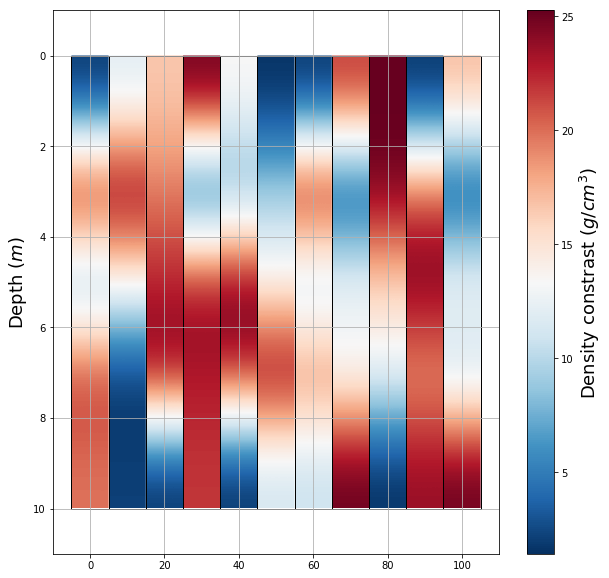

In [12]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow
plt.figure( figsize=(10,10) )

beta = 3.7 # valor do coeficiente de decaimento para a fórmula do constraste de densidade
rho0 = 2.78 # valor do constraste de densidade da superfície para a fórmula do constraste de densidade

for i in range(nobs):    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    cden = np.zeros( len(xp) )
    for j in range( len(xp) ): # construindo um vetor com valores de constraste de densidade aleatórios
        #zz = np.linspace( 0.0, p[i], len(xp), endpoint=True )
        #cden[j] = rho0 * beta**2/( beta + zz[j] )**2 # aplicação da fórmula do constraste da densidade 
        cden[j] = random.uniform(0.0, 30.0)
    print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=min(cden), vmax=max(cden),
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    # os valores de mi e ma serão usados para definir os extremos da escala de cor do plt.imshow no próximo code
    # lista1 salvará todos os valores de contraste de densidade gerados para serem usados no próximo code
    if i == (nobs - 1):
        mi = min(cden)
        ma = max(cden) 
    if i == 0: 
        lista1 = [cden]
    else:    
        lista1.append(cden)
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
# se a colorbar for colocada dentro do for, será possível ver que é adotada uma escala de cor para cada prisma separado
# pelo comentário acima, foi visto uma necessidade de padronizar essa colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 2 => [17.52513644 20.8347549  23.80834279 26.91360806  1.34960914]


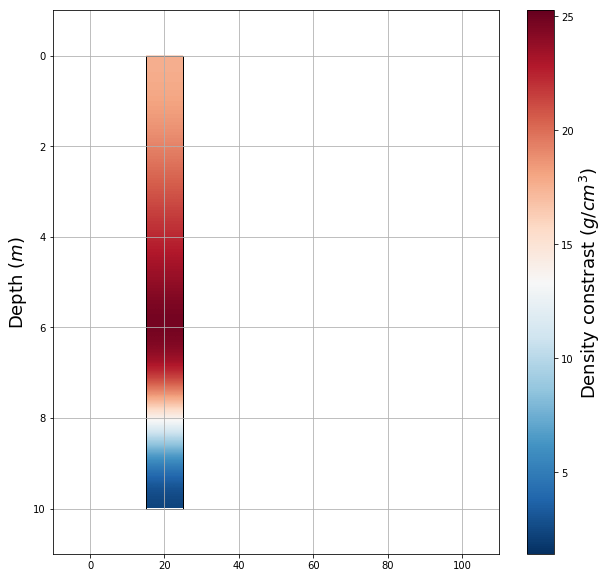

In [13]:
# Conferindo a colorbar para cada prisma (ATUALIZANDO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 2 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

cden = np.array(lista1[i]) 
print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)
    
im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=mi, vmax=ma,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) 
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [20.037921335208512, 13.575873363520774, 27.705145903413342, 4.498674571623854, 27.64512424593105]
i = 1 => [21.868976513846757, 27.362161539068428, 13.004125054923607, 26.271422782293364, 10.656318992841566]
i = 2 => [26.065876463496288, 25.099479427848447, 27.69764320824392, 6.836423088702479, 18.0328460735753]
i = 3 => [14.708957997137183, 13.031185048076232, 11.824508909549884, 21.837971954144685, 7.1676404024523475]
i = 4 => [15.036330234237692, 11.568456560164966, 14.226652185962255, 12.238278586354154, 16.055253550964757]
i = 5 => [16.5940274297959, 2.8908056768120307, 6.116390052074358, 14.158059026565498, 26.200620808601403]
i = 6 => [15.677338300402274, 6.020693390897163, 11.91773151900835, 7.536811550548329, 20.19067711564967]
i = 7 => [23.370714562704805, 14.684586726024836, 11.959111798195107, 18.413754119034927, 6.382500019508218]
i = 8 => [6.736957197222332, 28.655061387099444, 17.51300353599741, 5.393442376999618, 7.399512233166754]
i = 9 => [23.029198703921185

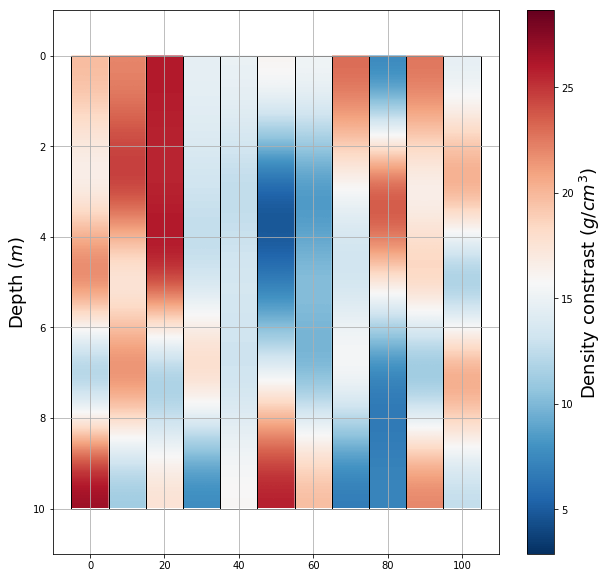

In [14]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow (ATUALIZADO)
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs):
    # gerando valores aleatórios para contraste de densidade
    # salvando os valores máximos e mínimos de contraste de densidade para a escala de cor de plt.imshow
    for j in range( len(xp) ): 
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0: 
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente

for i in range (nobs):
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    # os valores de mi2 e ma2 serão usados para definir os extremos da escala de cor do plt.imshow no próximo code
    if i == (nobs - 1):
        for j in range ( len(xp) ):
            if j == 0:
                mi2 = cden[i][j]
                ma2 = cden[i][j]
            else:
                if cden[i][j] > ma2:
                    ma2 = cden[i][j]
                if cden[i][j] < mi2:
                    mi2 = cden[i][j]
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma]) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

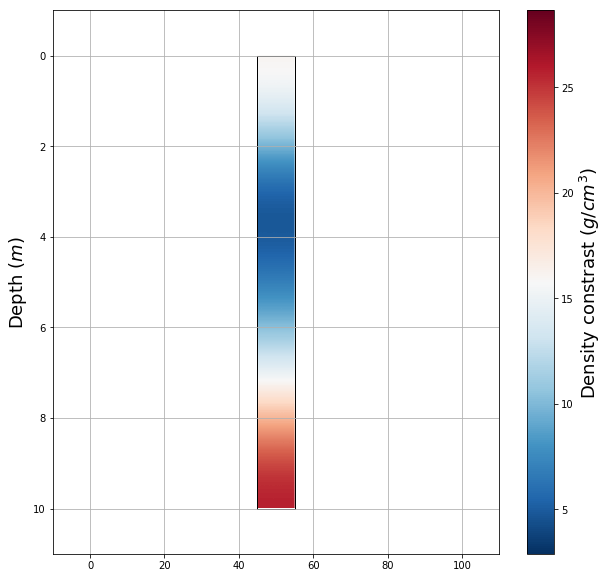

In [15]:
# Conferindo a colorbar para cada prisma (ATUALIZADO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 5 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)

cden_part = np.array( cden[i] )
im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma])
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [10.780477145147318, 16.283800782185722, 0.5893213692394916, 2.495065155378484, 6.997960698949531]
i = 1 => [26.328551286102428, 29.313197465503542, 28.24065145377372, 10.57013616080409, 20.091041804330246]
i = 2 => [25.167143457550083, 24.73182071341299, 25.125963744736907, 29.029642068722435, 4.3752561898878355]
i = 3 => [3.0285454814171784, 20.607091111288646, 9.535219169491619, 1.388922113100317, 0.5972720292281808]
i = 4 => [27.877821249851642, 11.33385404927698, 20.49139577838307, 24.069423754151988, 26.318264087438944]
i = 5 => [10.950755251581137, 14.402709576800024, 5.976551277314729, 16.585248327310083, 20.707543427683635]
i = 6 => [8.373974147780675, 10.087478519623554, 3.8732915676205937, 25.30760533013378, 9.478194098920365]
i = 7 => [21.077937981172337, 4.42584444906394, 10.253452551161578, 16.814389925039467, 6.203820075406475]
i = 8 => [11.687425501901615, 11.911311817741442, 14.329817248649578, 8.827857506924914, 3.201359613076601]
i = 9 => [20.59491937321904,

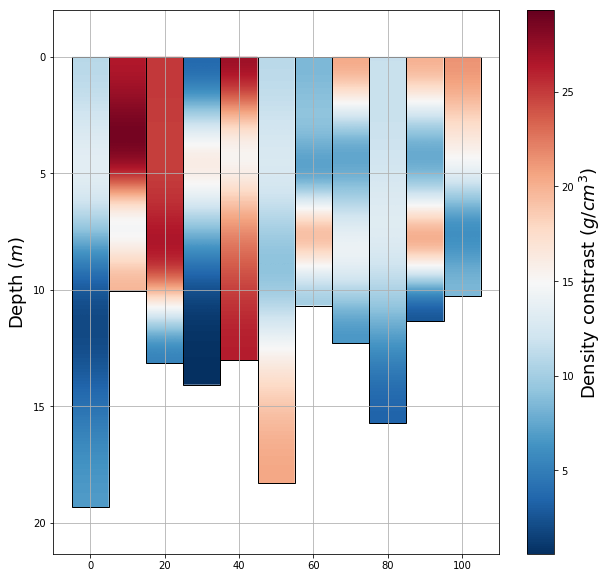

In [16]:
# Aplicando o relevo aos prismas já coloridos devidamente com o plt.imshow
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs): 
    # gerando valores aleatórios para contraste de densidade
    # salvando os valores máximos e mínimos de contraste de densidade para a escala de cor de plt.imshow
    for j in range( 5 ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0:
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
     
for i in range (nobs): # pintando as áreas dos retângulos     
    zp = np.array([ z[i], z[i], z[i] + p[i] , z[i] + p[i], z[i] ])
    # salvando os valores máximos e mínimos de profundidade para definir melhor o intervalo do eixo y
    if i == 0:
        zmin2 = z[i] 
        zmax2 = z[i] + p[i]
    else:
        if z[i] + p[i]  > zmax2:
            zmax2 = z[i] + p[i]
        if z[i]  < zmin2:
            zmin2 = z[i] 
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim(zmax2 + 2, zmin2 - 2)

plt.grid()
plt.show()

# Tarefa:
> Testar a função plots_paint_rectangles para plotar retângulos pintados de forma que representem o ambiente com uma certa fidelidade e que sejam pintados de acordo com alguma propriedade ou grandeza física das subperfícies que esteja em estudo. Essa função será testada em dois casos que são descritos abaixo. <br>
>> (1) Considerar essa propriedade ou grandeza física constante para cada retângulo (OK) <br>
>> (2) Considerar essa propriedade ou grandeza física variando para cada retângulo (OK)

## TODO:
> (1) Generalizar o numero de pontos (elementos de var) dentro de cada prisma para plotagem (refinar as cores) (OK)<br>
> (2) A pessoa estipula a nivel de referencia que deseja utilizar para a posicao do topo de cada prismas. (Essa é uma questão que foi deixada de lado, pois não era o foco do momento)

i = 0 => [4.8647532201140775, 0.35288667065774715, 8.050934942269436, 13.251148544423748, 11.333865220745338]
i = 1 => [22.67143235480674, 1.4198091765227105, 1.9097197337512573, 8.604533475616554, 14.950219334061298]
i = 2 => [9.341314452216919, 25.90276577589295, 26.730753906959226, 20.39896604699679, 24.48675611770222]
i = 3 => [10.695557998938426, 19.86987364427529, 4.723612191602768, 11.293333700103155, 16.310178563499072]
i = 4 => [27.246871347698963, 18.402364718901627, 2.2886972025649523, 0.49835504161202193, 1.3208317981481377]
i = 5 => [8.417860743518643, 4.073404138422681, 13.516204094290435, 6.29453186112245, 22.55944332659228]
i = 6 => [19.804344455182502, 6.915469742531084, 18.289260398948628, 20.946244189392672, 7.6526808818196255]
i = 7 => [8.064612068425706, 24.57738344382915, 2.3043164320734597, 16.0990326226231, 26.808580338916308]
i = 8 => [27.745477842309608, 14.591910249170223, 9.0954304778525, 13.655105474859837, 18.959419329390194]
i = 9 => [9.036601428058546, 9

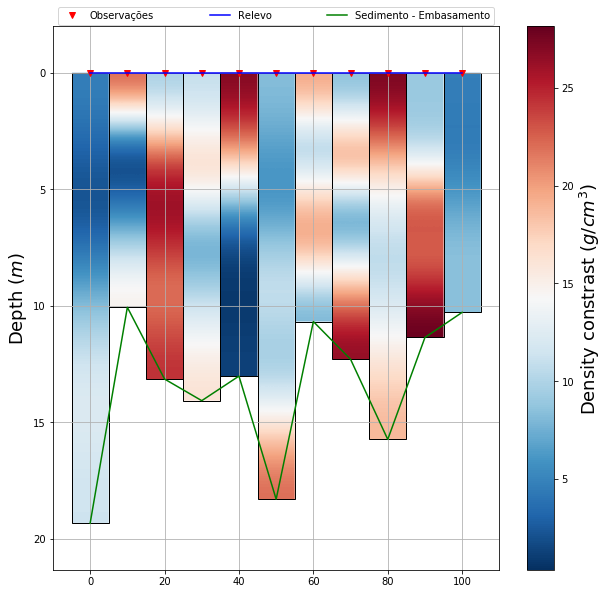

In [17]:
# Caso em que a propriedade ou grandeza física varia ou é constante para cada retângulo:
cden = []
n = 5
for i in range (nobs):
    for j in range( n ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
            
plots_paint_rectangles(x, z, p, n_var=n, var=cden, name='Density constrast $(g/cm^3)$', cmap='RdBu_r',
                       color1='blue', color2='green')

# Tarefa:
> Aplicar uma rotina computacional que calcula o valor da anomalia gravitacional em cada ponto de observação considerando todos os retângulos gerados. <br>
>> (1) Adaptar a equação para o calculo da anomalia gravitacional gerada apenas por um retângulo qualquer. <br>
>> (2) Expandir a adaptação em (1) para o caso de um modelo que considera diversos retângulos. 

In [15]:
import prism

In [17]:
# Caso que considera apenas o primeiro retangulo gerado pelo modelo

# Setting the parameters for prism
model = [x[0] - x_prisma, x[0] + x_prisma, 0.0, 0.001, zmin, zmax] # meters + g/cm3

y = x*0.0

# Calculating the gravity components
gx1 = prism.prism_gx(x, y, z, model, 2.67)
gy1 = prism.prism_gy(x, y, z, model, 2.67)
gz1 = prism.prism_gz(x, y, z, model, 2.67)

/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules/auxiliars.py:175: RuntimeWarning: divide by zero encountered in log
  log = numpy.log(x)


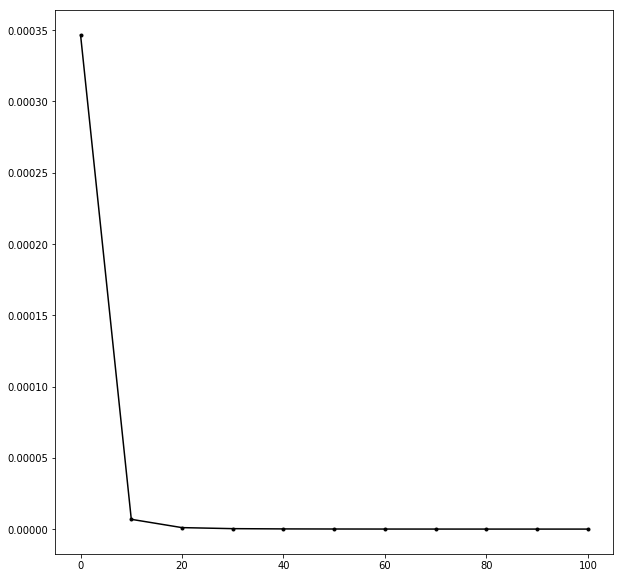

In [18]:
# Ploting all results
plt.close('all')
plt.figure(figsize=(10, 10))

plt.plot(x,gz1,'.-k')
plt.show()

In [22]:
# Caso que considera todos os retangulos gerados nesse modelo

y = x*0.0

gx2 = 0
gy2 = 0
gz2 = 0
for i in range (nobs):
    model = [x[i] - x_prisma, x[i] + x_prisma, 0.0, 0.001, zmin, zmax] # meters + g/cm3
    for j in range (nobs):
        # Calculating the gravity components
        gx2 += prism.prism_gx(x, y, z, model, 2.67)
        gy2 += prism.prism_gy(x, y, z, model, 2.67)
        gz2 += prism.prism_gz(x, y, z, model, 2.67)

/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules/auxiliars.py:175: RuntimeWarning: divide by zero encountered in log
  log = numpy.log(x)


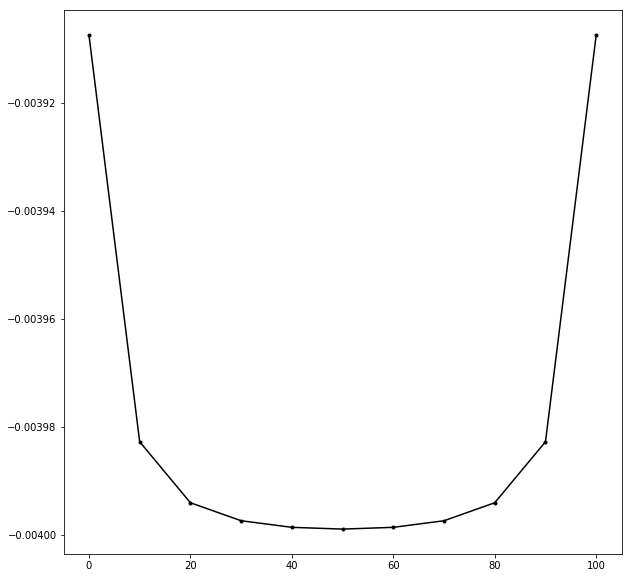

In [23]:
# Ploting all results
plt.close('all')
plt.figure(figsize=(10, 10))

plt.plot(x,gz2,'.-k')
plt.show()

In [ ]:
### USO DO ENUMERATE PARA EVENTUAIS LOOPS MULTIPLOS
A = np. ones( (2,5) )
A[0,:] = 5.0

In [ ]:
for i,j in enumerate(A):
    print(i)